In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

ImportError: No module named seaborn

In [2]:
d = {'one' : [1., 2., 3., 4.],
    'two' : [4., 3., 2., 1.],
    'good' :[True, False, False, True]}
    
df = pd.DataFrame(d, index=['a', 'b', 'c', 'd'])
df

,good,one,two
a,True,1,4
b,False,2,3
c,False,3,2
d,True,4,1


In [3]:
df['good']

a     True
b    False
c    False
d     True
Name: good, dtype: bool

In [5]:
df.good

a     True
b    False
c    False
d     True
Name: good, dtype: bool

In [4]:
df[['good', 'two']]

,good,two
a,True,4
b,False,3
c,False,2
d,True,1


In [30]:
df.loc[['a', 'd']]

,good,one,two
a,True,1,4
d,True,4,1


In [31]:
df.loc['a':'b']

,good,one,two
a,True,1,4
b,False,2,3


In [32]:
df.iloc[0:2]

,good,one,two
a,True,1,4
b,False,2,3


In [33]:
df.loc['b', 'good']

False

## Reading in example data

In [34]:
df = pd.read_csv('data.csv')

df['Series ID']= ['Labor force', 'Participation rate', 
                 'Rate', 'Rate - 16-19 yrs','Rate - 20+ yrs (Men)',
                  'Rate - 20+ yrs (Women)','Rate - White',
                 'Rate - Black or African American','Rate - Asian',
                 'Rate - Hispanic or Latino','No High School Diploma',
                  'High School Graduates','Some College or Associate Degree',
                  'Bachelor degree and higher','Under 5 Weeks',
                 '5-14 Weeks', '15 Weeks & over', '27 Weeks & over']
df.drop('Jan 2000', axis=1, inplace=True)
df.set_index(df['Series ID'], inplace=True)
df.drop('Series ID', axis=1, inplace=True)
df = df.transpose().convert_objects(convert_numeric=True)

df.head()

Series ID,Labor force,Participation rate,Rate,Rate - 16-19 yrs,Rate - 20+ yrs (Men),Rate - 20+ yrs (Women),Rate - White,Rate - Black or African American,Rate - Asian,Rate - Hispanic or Latino,No High School Diploma,High School Graduates,Some College or Associate Degree,Bachelor degree and higher,Under 5 Weeks,5-14 Weeks,15 Weeks & over,27 Weeks & over
Feb 2000,142456,67.3,4.1,13.8,3.5,3.6,3.6,8.1,NaN,5.7,6.0,3.4,3.0,1.6,2604,1912,1300,629
Mar 2000,142434,67.3,4.0,13.3,3.2,3.7,3.5,7.4,NaN,6.1,6.6,3.3,2.8,1.7,2780,1781,1312,646
Apr 2000,142751,67.3,3.8,12.6,3.1,3.5,3.4,7.0,NaN,5.5,6.2,3.3,2.6,1.5,2510,1845,1261,599
May 2000,142388,67.1,4.0,12.8,3.3,3.7,3.5,7.7,NaN,5.8,6.9,3.4,2.6,1.6,2564,1911,1325,643
Jun 2000,142591,67.1,4.0,12.3,3.2,3.7,3.4,7.8,NaN,5.6,6.3,3.4,2.7,1.6,2579,1753,1242,627


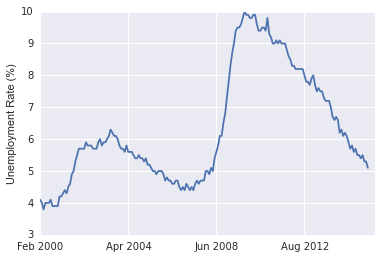

In [35]:
df['Rate'].plot()
plt.ylabel('Unemployment Rate (%)')
plt.gcf().set_facecolor('white')
plt.savefig('fig1.png', dpi=150)


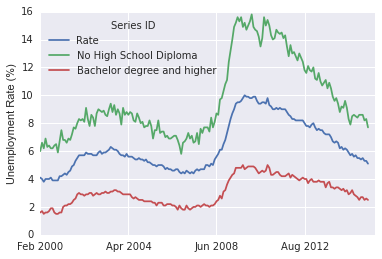

In [36]:
df[['Rate', 'No High School Diploma', 'Bachelor degree and higher']].plot()
plt.ylabel('Unemployment Rate (%)')
plt.gcf().set_facecolor('white')
plt.savefig('fig2.png', dpi=150)

## GroupBy

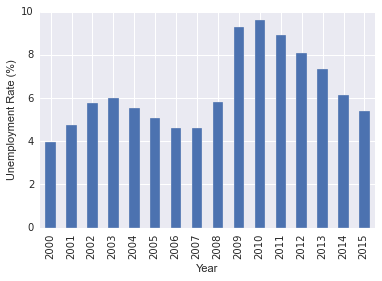

In [37]:

df['Year']=(df.index.to_datetime()).year
years = df.groupby('Year')
years['Rate'].mean().plot(kind='bar')
plt.ylabel('Unemployment Rate (%)')
plt.gcf().subplots_adjust(bottom=0.15)
plt.savefig('fig3.png', dpi=150)

In [38]:
years.get_group(2005)['Rate'].describe()

count    12.000000
mean      5.083333
std       0.158592
min       4.900000
25%       5.000000
50%       5.000000
75%       5.200000
max       5.400000
Name: Rate, dtype: float64

In [39]:
years['Rate'].agg([np.mean, np.std, max, min])

,mean,std,max,min
Year,,,,
2000,3.963636,0.092442,4.1,3.8
2001,4.741667,0.528219,5.7,4.2
2002,5.783333,0.102986,6.0,5.7
2003,5.991667,0.178164,6.3,5.7
2004,5.541667,0.131137,5.8,5.4
2005,5.083333,0.158592,5.4,4.9
2006,4.608333,0.131137,4.8,4.4
2007,4.616667,0.164225,5.0,4.4
2008,5.800000,0.780443,7.3,4.9


## Boolean Indexing

In [40]:
sum(df['Rate'] > 7)

59

## String Methods  [Docs](http://pandas.pydata.org/pandas-docs/stable/text.html)

In [28]:
s = pd.Series(['Dog', 'Bat', 'Coon', 'cAke', 'bAnk',  'CABA', 'dog', 'cat'])
s[s.str.contains('B')]

1     Bat
5    CABA
dtype: object

In [40]:
s.str.replace('dog|cat', 'nope ', case=False)

0    nope 
1      Bat
2     Coon
3     cAke
4     bAnk
5     CABA
6    nope 
7    nope 
dtype: object